# Theme of this notebook - Various ways to build a regression model
* This notebook covers how to build a regression model by using Excel functions(Solver, Data Analysis), scikit-learn, or statsmodel
* Let's practice throughout solving sample questions

* Sample problem<br>
Analyze the data source in ‘kc-house-data.csv’ file. This data source is a part of databases available in
the public domain. This file contains 21,613 observations of real-estate properties of King county in
Washington state. The data for the following 21 variables are provided.

In [36]:
  # Problem A
# Read the raw data source file ‘kc-house-data.csv’. Retrieve the first 100 observations from this
# file. Build a linear regression model using the data retrieved in the previous step. Use ‘price’ (y)
# as your response variable and ‘bedrooms’ (x) as your predictor variable.

# Build your regression model using the following 6 methods.
# 1. Closed form solution – using only the mean of ‘x’, ‘y’, ‘x*y’, ‘x**2' variables.
# 2. Closed form solution – using the correlation coefficient between ‘x’ and ‘y’ variables and
# the standard deviation of both variables.
# 3. Closed form solution – using matrix (use Python for matrix manipulation)
# 4. Excel – Solver (Gradient Decent Algorithm)
# 5. Excel – Data Analysis/Regression function
# 6. Python (Scikit-Learn & Statsmodels Python Libraries)

# Load data from Google Drive
import pandas as pd
kc = pd.read_csv('stat-004_kc_house_data.csv')

# Retrieve the first 100 observations
kc_100 = kc.head(100)
kc_100

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1483300570,20140908T000000,905000.0,4,2.50,3300,10250,1.0,0,0,...,7,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045
96,3422049190,20150330T000000,247500.0,3,1.75,1960,15681,1.0,0,0,...,7,1960,0,1967,0,98032,47.3576,-122.277,1750,15616
97,1099611230,20140912T000000,199000.0,4,1.50,1160,6400,1.0,0,0,...,7,1160,0,1975,0,98023,47.3036,-122.378,1160,6400
98,722079104,20140711T000000,314000.0,3,1.75,1810,41800,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036


In [37]:
# 1. Closed form solution – using only the mean of ‘x’, ‘y’, ‘x*y’, ‘x**2' variables.
# Caluculate each mean first.

x_bedrooms = kc_100['bedrooms']
y_prices = kc_100['price']

x_mean = x_bedrooms.mean()
y_mean = y_prices.mean()
xy_mean = (x_bedrooms*y_prices).mean()
x2_mean = (x_bedrooms**2).mean()

# Caluculate slope
slope_1 = (xy_mean - x_mean * y_mean) / (x2_mean - x_mean * x_mean)

# Calculate intercept
intercept_1 = y_mean - slope_1 * x_mean

print(f"Intercept is: {round(intercept_1,3)}")
print(f"Slope is: {round(slope_1,3)}")

Intercept is: 56389.279
Slope is: 136105.903


In [38]:
# 2. Closed form solution – using the correlation coefficient between ‘x’ and ‘y’ variables and

# Compute slope
x_sigma = x_bedrooms.std()
y_sigma = y_prices.std()
xy_corr = x_bedrooms.corr(y_prices)

# Caluculate slope
slope_2 = xy_corr * (y_sigma/x_sigma)

# Caluculate intercept
intercept_2 = y_mean - slope_2 * x_mean

print(f"Intercept is: {round(intercept_2,3)}")
print(f"Slope is: {round(slope_2,3)}")

Intercept is: 56389.279
Slope is: 136105.903


In [39]:
# 3. Closed form solution – using matrix (use Python for matrix manipulation)
# Caluculate 𝑨 = (𝑿𝑻𝑿)−𝟏𝑿𝑻𝒀 by using matrix

# Create np_array
import numpy as np
x_list = []
for i in x_bedrooms:
  x_list.append([1,i])
x_array = np.array(x_list)

y_list = []
for j in y_prices:
  y_list.append([j])
y_array = np.array(y_list)

#Calculate XTX-1 and XTY
XTX = np.dot(x_array.T,x_array)
XTX_power_minus1 = np.linalg.matrix_power(XTX,-1)
XTY = np.dot(x_array.T,y_array)
A = np.dot(XTX_power_minus1,XTY)

print(f"Intercept is: {round(float(A[0]),3)}")
print(f"Slope is: {round(float(A[1]),3)}")

Intercept is: 56389.279
Slope is: 136105.903


# A-4. Excel – Solver (Gradient Decent Algorithm)
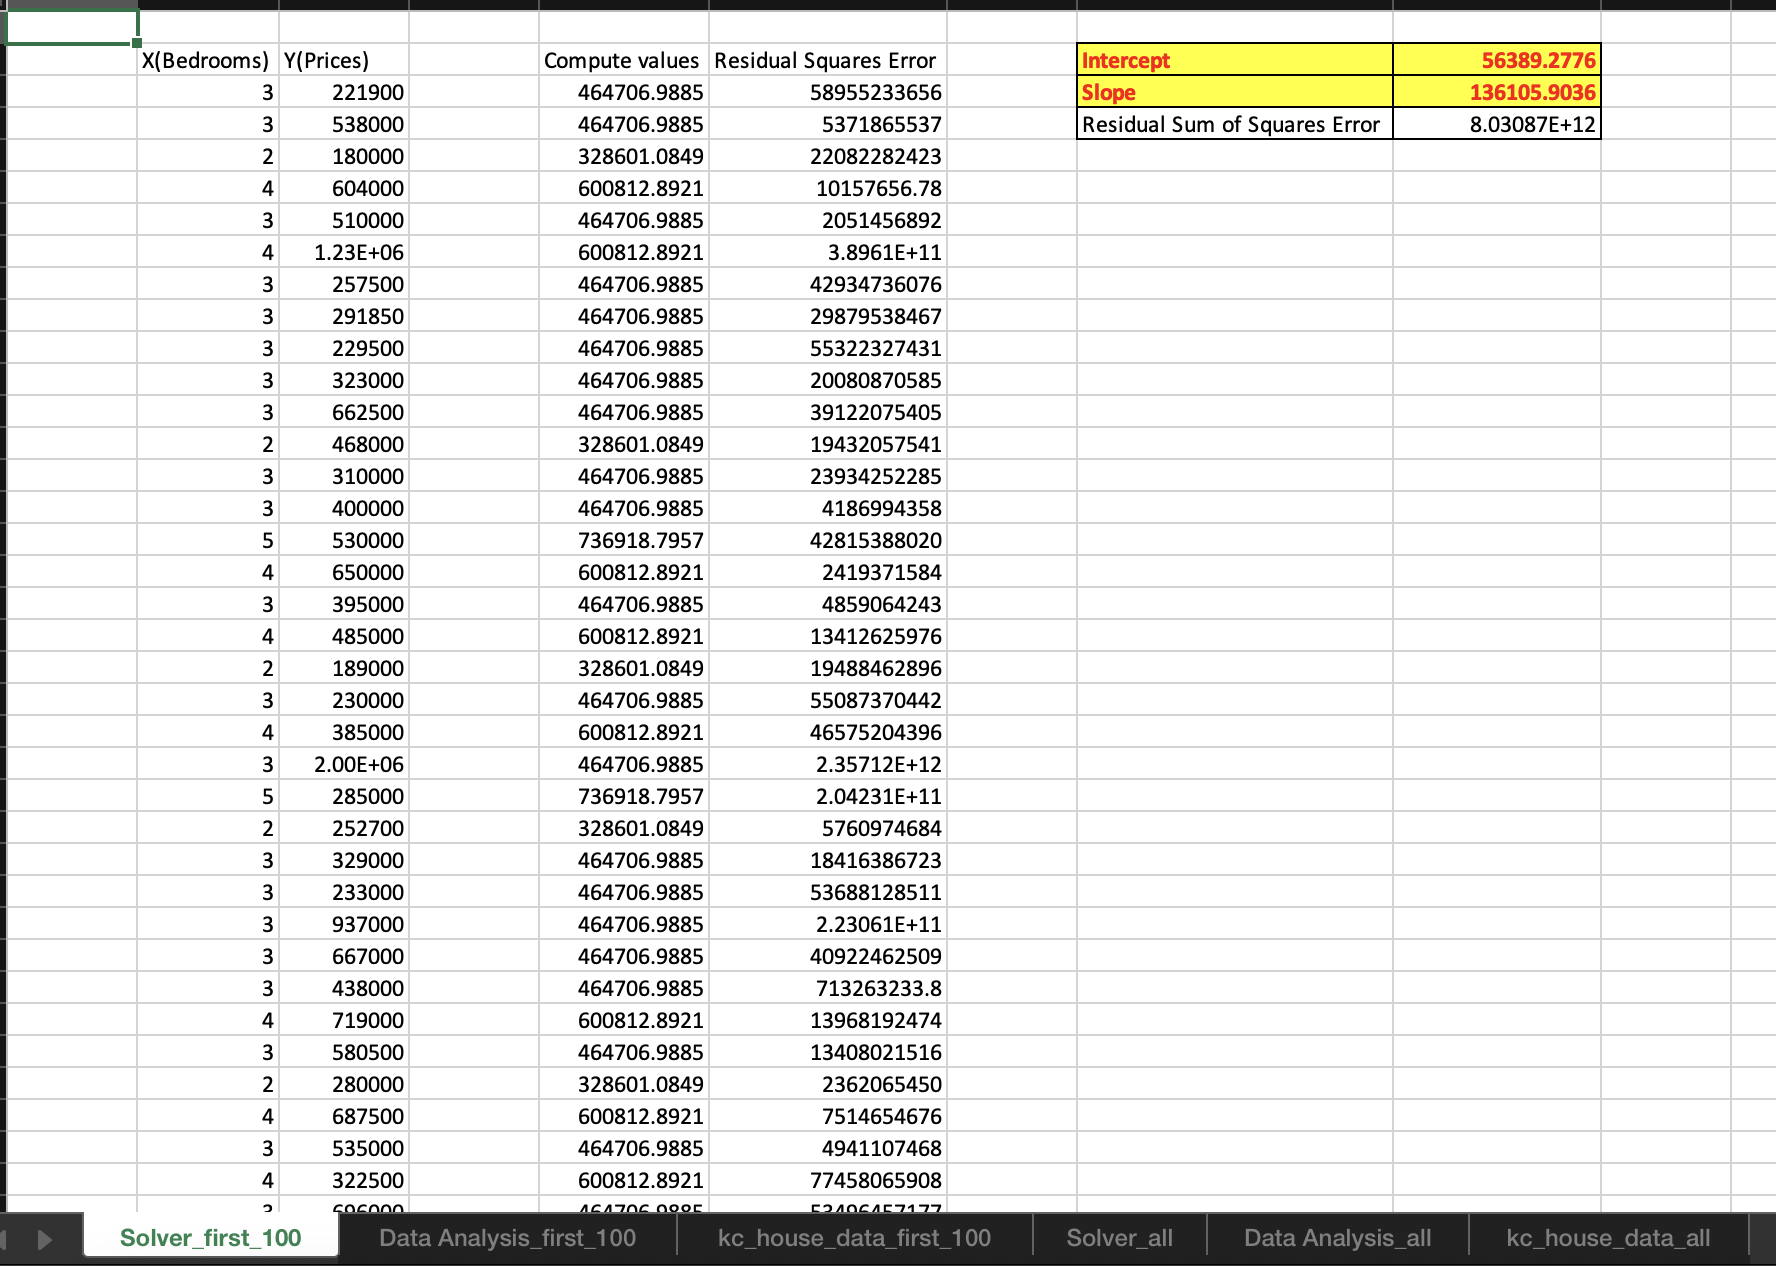

# A-5. Excel – Data Analysis/Regression function
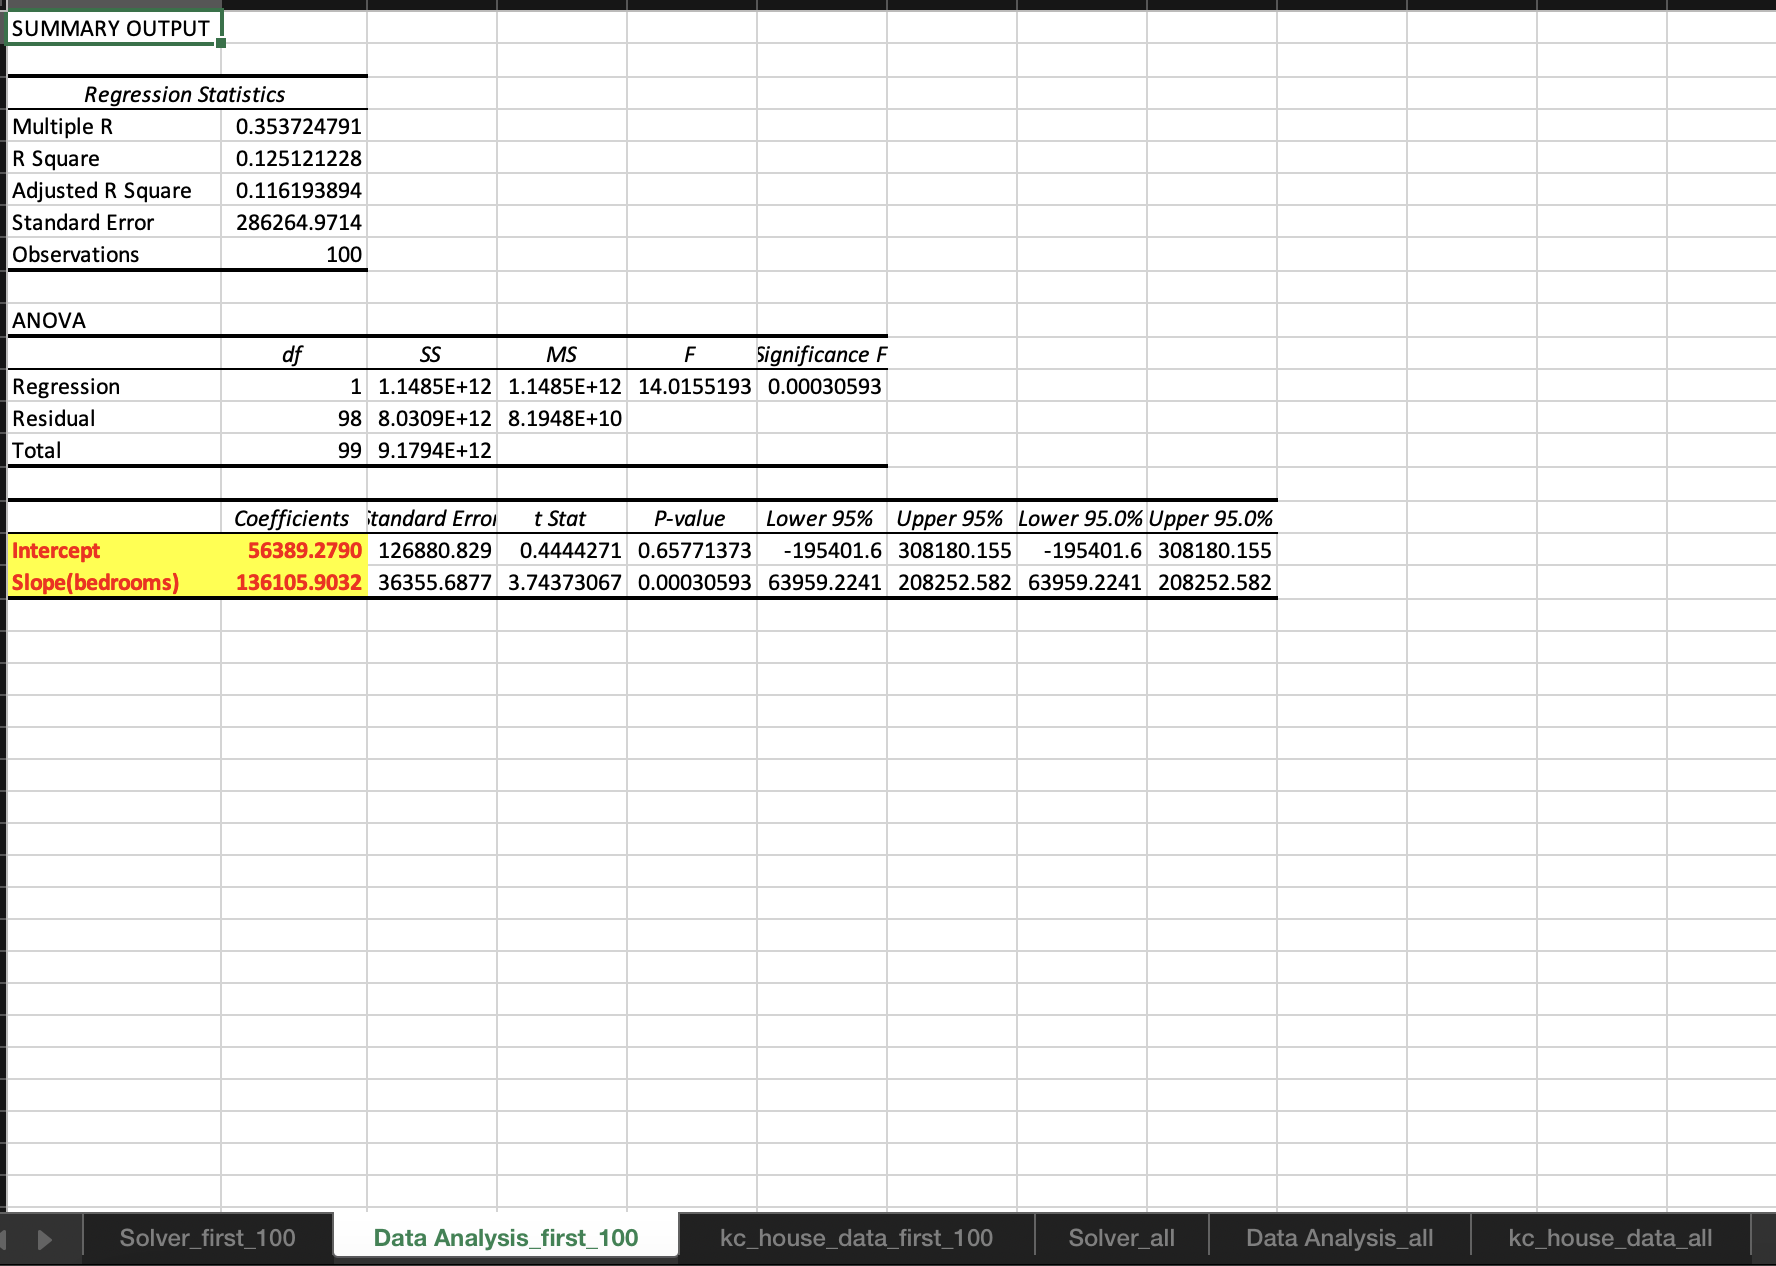

In [40]:
# 6-1. Python (Scikit-Learn & Statsmodels Python Libraries)
# import scikit-learn
from sklearn.linear_model import LinearRegression

# Traning the model
model_1 = LinearRegression()
x_bedrooms_2d = np.array(x_bedrooms.values).reshape(-1,1)
model_1.fit(x_bedrooms_2d,y_prices)

print(f"Intercept is: {round(model_1.intercept_,3)}")
print(f"Slope is: {round(model_1.coef_[0],3)}")

Intercept is: 56389.279
Slope is: 136105.903


In [41]:
# 6-2. Python (Statsmodels Python Libraries)
# import statsmodel library
import statsmodels.formula.api as smf

model_2 = smf.ols(formula='price ~ bedrooms', data=kc_100).fit()
print(f"Intercept is: {round(model_2.params[0],3)}")
print(f"Slope is: {round(model_2.params[1],3)}")

Intercept is: 56389.279
Slope is: 136105.903


In [42]:
# Problem B
# Build regression model described in the previous step using all the 21,613 observations.
# Which method is the best for real-world data?

In [43]:
# 1. Closed form solution – using only the mean of ‘x’, ‘y’, ‘x*y’, ‘x**2' variables.
# Caluculate each mean first.

x_bedrooms_all = kc['bedrooms']
y_prices_all = kc['price']

x_mean_all = x_bedrooms_all.mean()
y_mean_all = y_prices_all.mean()
xy_mean_all = (x_bedrooms_all*y_prices_all).mean()
x2_mean_all = (x_bedrooms_all**2).mean()

# Caluculate slope
slope_1_all = (xy_mean_all - x_mean_all * y_mean_all) / (x2_mean_all - x_mean_all * x_mean_all)

# Calculate intercept
intercept_1_all = y_mean_all - slope_1_all * x_mean_all

print(f"Intercept is: {round(intercept_1_all,3)}")
print(f"Slope is: {round(slope_1_all,3)}")

Intercept is: 129802.356
Slope is: 121716.127


In [44]:
# 2. Closed form solution – using the correlation coefficient between ‘x’ and ‘y’ variables and

# Compute slope
x_sigma_all = x_bedrooms_all.std()
y_sigma_all = y_prices_all.std()
xy_corr_all = x_bedrooms_all.corr(y_prices_all)

# Caluculate slope
slope_2_all = xy_corr_all * (y_sigma_all/x_sigma_all)

# Caluculate intercept
intercept_2_all = y_mean_all - slope_2_all * x_mean_all

print(f"Intercept is: {round(intercept_2_all,3)}")
print(f"Slope is: {round(slope_2_all,3)}")

Intercept is: 129802.356
Slope is: 121716.127


In [45]:
# 3. Closed form solution – using matrix (use Python for matrix manipulation)
# Caluculate 𝑨 = (𝑿𝑻𝑿)−𝟏𝑿𝑻𝒀 by using matrix

# Create np_array
x_list_all = []
for k in x_bedrooms_all:
  x_list_all.append([1,k])
x_array_all = np.array(x_list_all)

y_list_all = []
for l in y_prices_all:
  y_list_all.append([l])
y_array_all = np.array(y_list_all)

#Calculate XTX-1 and XTY
XTX_all = np.dot(x_array_all.T,x_array_all)
XTX_power_minus1_all = np.linalg.matrix_power(XTX_all,-1)
XTY_all = np.dot(x_array_all.T,y_array_all)
A_all = np.dot(XTX_power_minus1_all,XTY_all)

print(f"Intercept is: {round(float(A_all[0]),3)}")
print(f"Slope is: {round(float(A_all[1]),3)}")

Intercept is: 129802.356
Slope is: 121716.127


# B-4. Excel – Solver (Gradient Decent Algorithm)
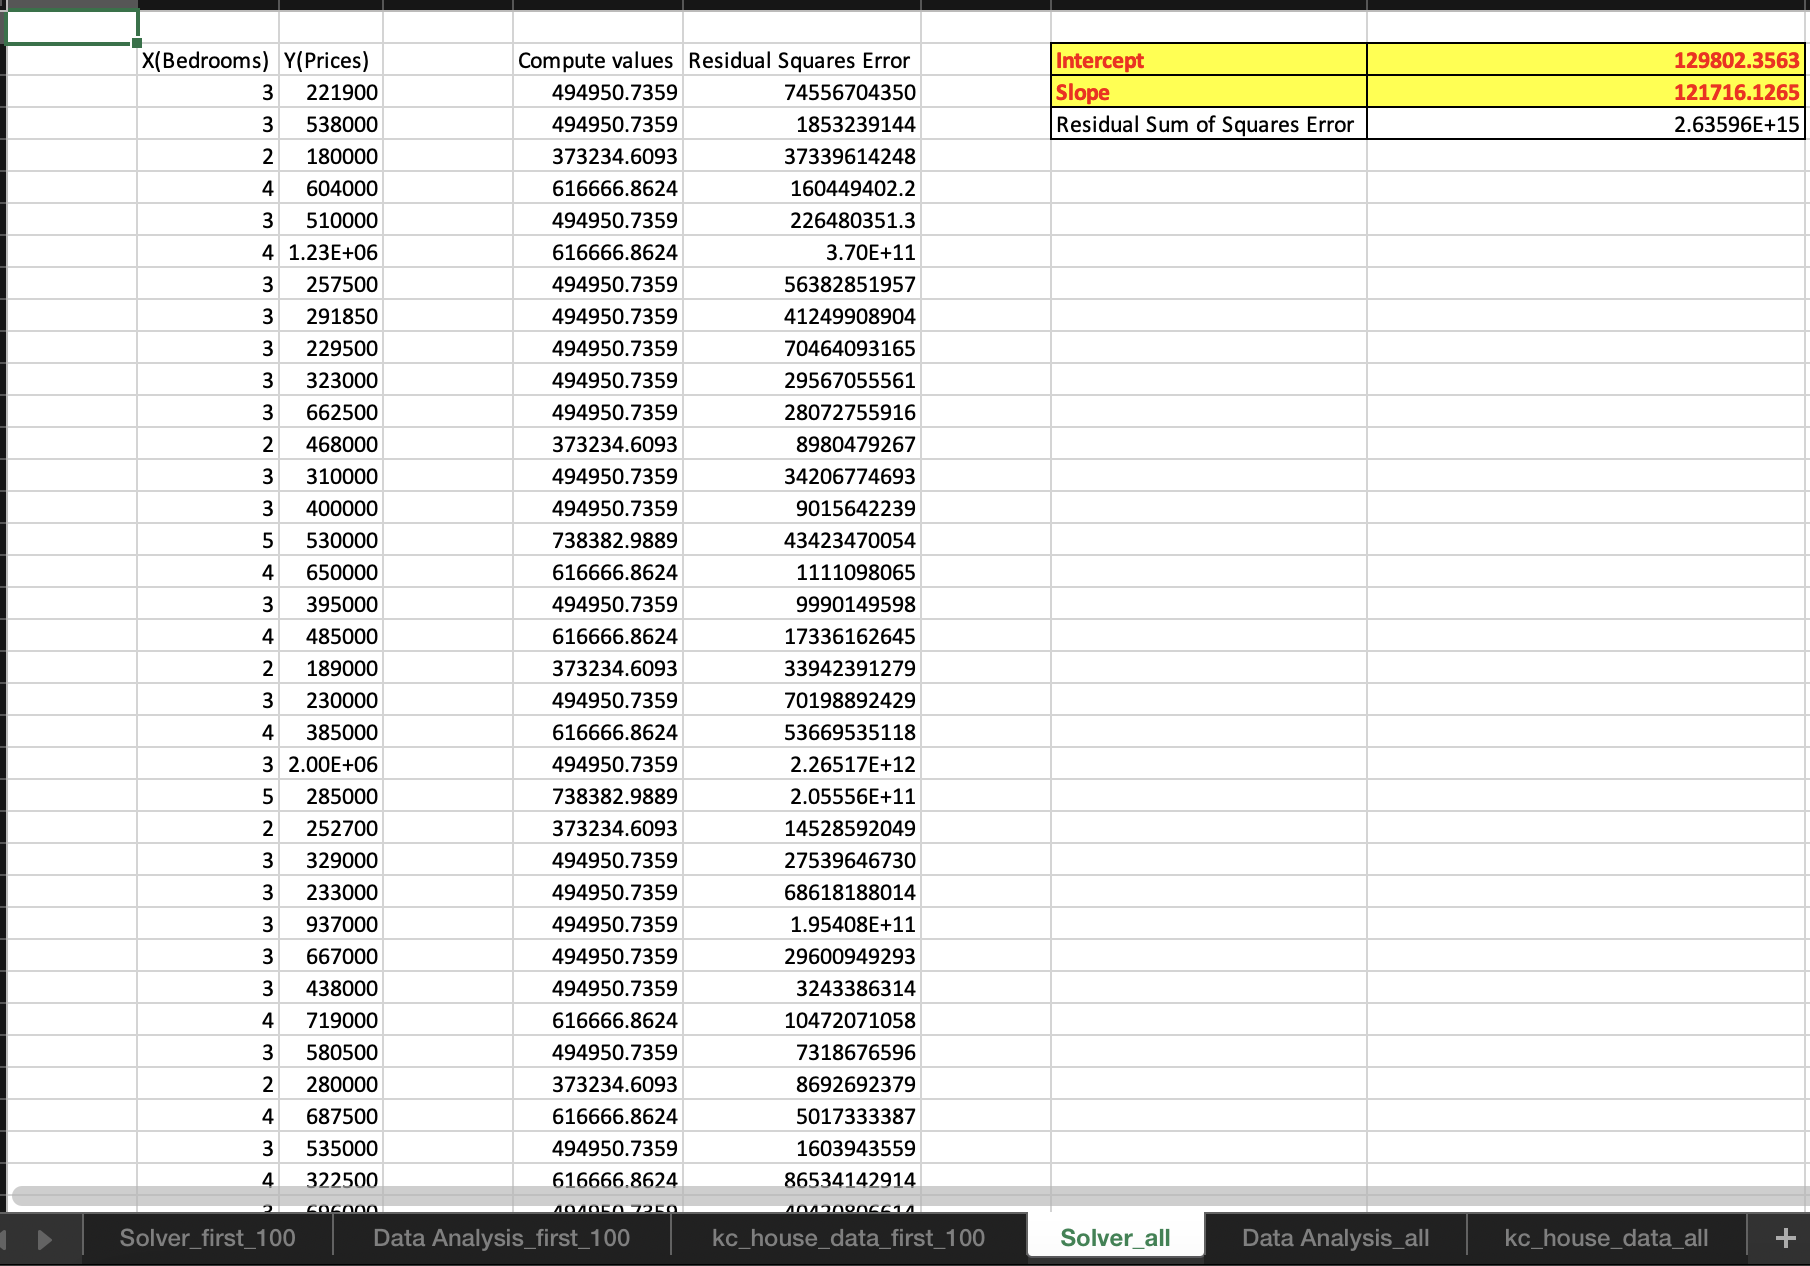

# B-5. Excel – Data Analysis/Regression function
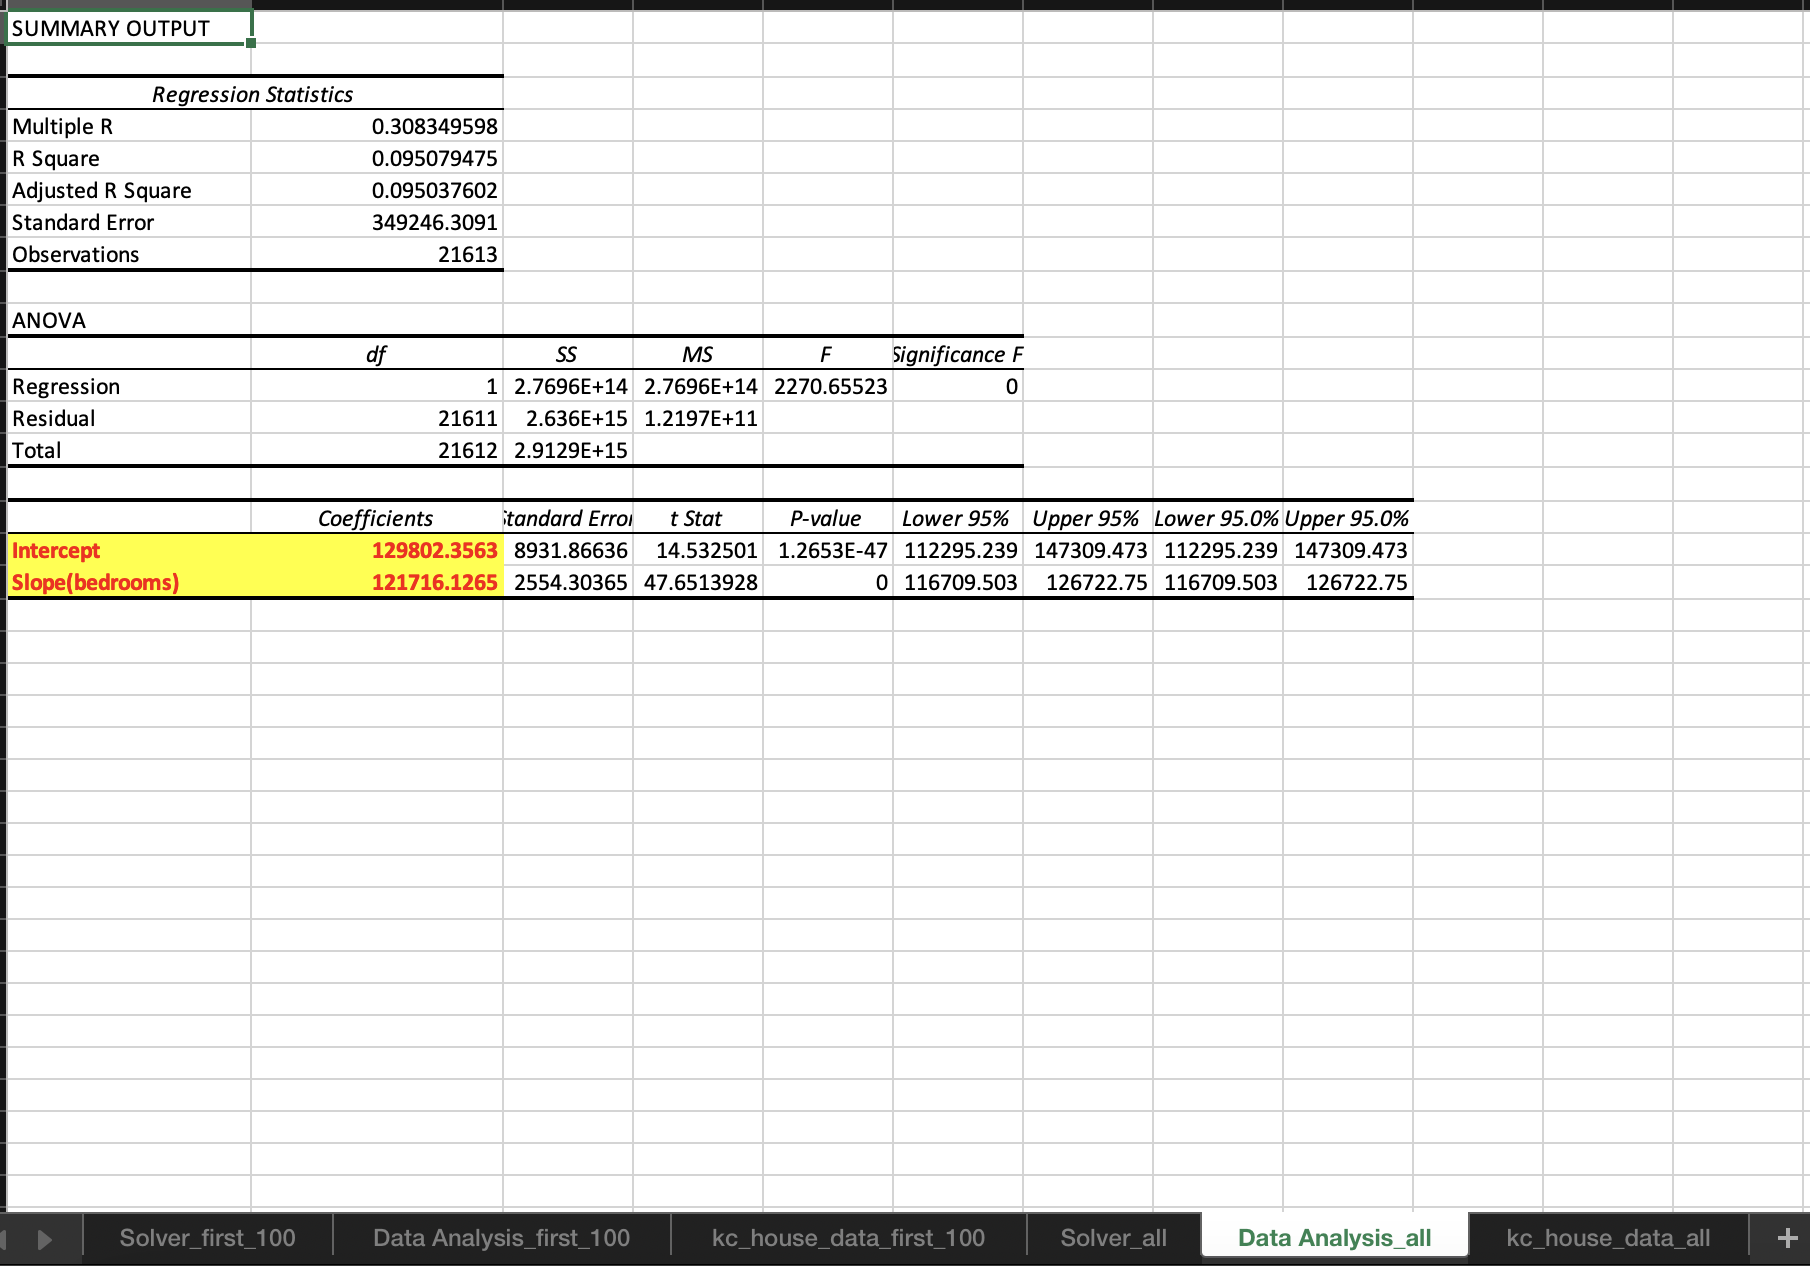

In [46]:
# 6-1. Python (Scikit-Learn & Statsmodels Python Libraries)

# Traning the model
model_1_all = LinearRegression()
x_bedrooms_all_2d = np.array(x_bedrooms_all.values).reshape(-1,1)

model_1_all.fit(x_bedrooms_all_2d,y_prices_all)
print(f"Intercept is: {round(model_1_all.intercept_,3)}")
print(f"Slope is: {round(model_1_all.coef_[0],3)}")

Intercept is: 129802.356
Slope is: 121716.127


In [47]:
# 6-2. Python (Statsmodels Python Libraries)
model_2_all = smf.ols(formula='price ~ bedrooms', data=kc).fit()

print(f"Intercept is: {round(model_2_all.params[0],3)}")
print(f"Slope is: {round(model_2_all.params[1],3)}")

Intercept is: 129802.356
Slope is: 121716.127


#Question:
Which method is the best for real-world data?

#Answer:
Using Scikit-Learn & Statsmodels Python Libraries is the best for real-world data.
There are several reasons.

1. The codes are reusable as long as you import the libraries. In other words, you need not write python codes from scratch.
2. The lengths of codes are shorter than other methods.
3. It is very easy to do random sampling when you want to train models by using train data and predict some values by using test data.

In [48]:
# Problem C
# Split the dataset into ‘train’ (67%) and ‘test’ (33%) randomly. Train = 14,480 observations, Test = 7,133 observations
# Use scikit-learn library
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(kc, test_size=7133,random_state=1)

print(train_data.shape)
print(test_data.shape)

(14480, 21)
(7133, 21)


In [49]:
# Problem D
# Build the Regression Model using the ‘train’ dataset.
# Build the model using both the Scikit-learn and StatsModels Python packages.
# Make sure that the regression coefficients computed by both Python packages give the same result.

# Define variables
x_bedrooms_train = np.array(train_data['bedrooms'].values).reshape(-1,1)
y_prices_train = train_data['price']

# Traning the scikit-learn model
model_1_train = LinearRegression()

model_1_train.fit(x_bedrooms_train,y_prices_train)
print(f"Intercept is: {round(model_1_train.intercept_,3)}")
print(f"Slope is: {round(model_1_train.coef_[0],3)}")

Intercept is: 148335.675
Slope is: 115817.612


In [50]:
# Traning the StatsModels
model_2_train = smf.ols(formula='price ~ bedrooms', data=train_data).fit()

print(f"Intercept is: {round(model_2_train.params[0],3)}")
print(f"Slope is: {round(model_2_train.params[1],3)}")

Intercept is: 148335.675
Slope is: 115817.612


# Problem E
Predict the response variable values for the ‘test’ dataset.
Since the response variable values of the test dataset is known,
compute the Root Mean Square Error (RMSE) using the following formula.

In [51]:
# import metrics
from sklearn.metrics import mean_squared_error

# Define variables
x_bedrooms_test = np.array(test_data['bedrooms'].values).reshape(-1,1)
y_prices_test = test_data['price'].values

# Predict from test_data using scikit-learn
y_predict_sk = model_1_train.predict(x_bedrooms_test)

# Compute Root Mean Squared Error
RMSE_sk = np.sqrt(mean_squared_error(y_prices_test, y_predict_sk))
print(f'RMSE: {RMSE_sk}')

RMSE: 368345.79996700835


In [52]:
#StatsModel Version

# import metrics
from statsmodels.tools.eval_measures import rmse

# Predict from test_data using StatsModels
y_predict_stats = model_2_train.predict(test_data['bedrooms'])

# Compute Root Mean Squared Error
RMSE_stats = rmse(y_prices_test,y_predict_stats)

print(f'RMSE: {RMSE_stats}')

RMSE: 368345.7999670084


In [53]:
#---End---